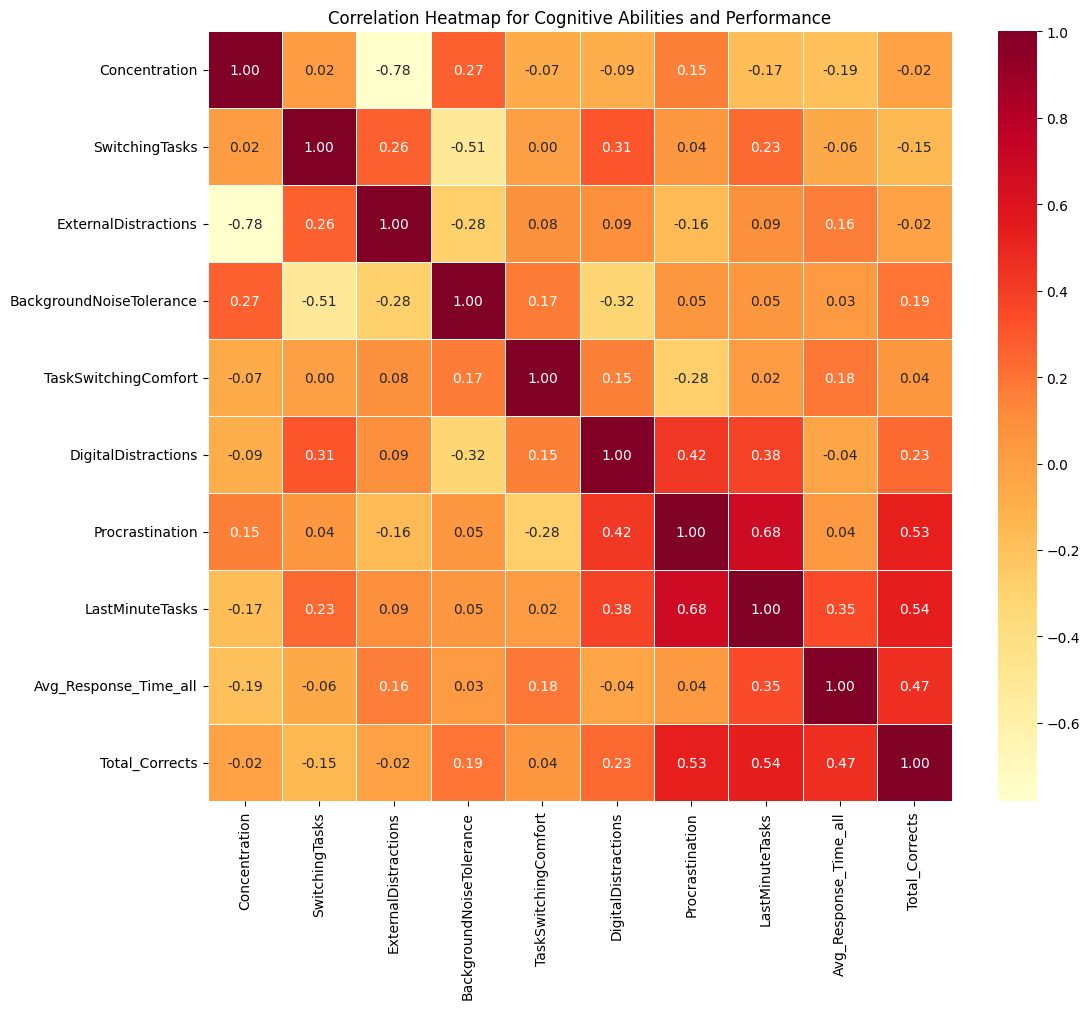

In [6]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'formresponses.csv' with the actual file path
cognitive_file_path = 'formresponses.csv'

# Read cognitive abilities data
cognitive_data = pd.read_csv(cognitive_file_path)

# Create an empty dataframe to store the merged data
merged_data = pd.DataFrame()

# Define the column names for cognitive abilities and performance data
cognitive_columns = [
    'Concentration', 'SwitchingTasks', 'ExternalDistractions',
    'BackgroundNoiseTolerance', 'TaskSwitchingComfort',
    'DigitalDistractions', 'Procrastination', 'LastMinuteTasks'
]

performance_columns = ['Response Time (s)']  # Assuming the performance data contains 'ResponseTime' and 'Correctness'

# Iterate through the participant IDs in the cognitive abilities data
for participant_id in cognitive_data['ID']:
    # Generate the file path for each participant's performance data
    if participant_id > 10:
        participant_id_str = str(participant_id)
    else:
        participant_id_str = "0"
    performance_folder_path = f'../group{participant_id_str[0]}/'
    performance_files = os.listdir(performance_folder_path)

    # Try to find a matching performance file based on participant ID in the file name
    matching_files = [file for file in performance_files if re.search(fr'{participant_id}', file)]

    if matching_files:
        matching_file_name = matching_files[0]
        performance_file_path = os.path.join(performance_folder_path, matching_file_name)

        # Read performance data for the current participant
        performance_data = pd.read_csv(performance_file_path)

        # Calculate average 'Response Time' and sum of 'Corrects' for each participant
        avg_response_time_all = performance_data['Response Time (s)'].mean()
        total_corrects = performance_data['Correct'].sum()

        # Merge cognitive abilities and performance data based on ParticipantID
        merged_data = pd.concat([
            merged_data,
            pd.merge(cognitive_data[cognitive_data['ID'] == participant_id],
                     performance_data[performance_columns], left_index=True, right_index=True)
        ])

        # Add average 'Response Time' and total 'Corrects' to the merged data
        merged_data.loc[merged_data['ID'] == participant_id, 'Avg_Response_Time_all'] = avg_response_time_all

        # Replace NaN with 0 in 'Correct' column
        merged_data.loc[merged_data['ID'] == participant_id, 'Total_Corrects'] = total_corrects if not pd.isna(
            total_corrects) else 0

# Select relevant columns for visualization
selected_data = merged_data[cognitive_columns + ['Avg_Response_Time_all', 'Total_Corrects']]


# Create a correlation matrix
correlation_matrix = selected_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Define a custom color palette in hex values
custom_palette = ["#FFD166", "#FF5B00", "#8C401A", "#593E1A"]

# Set the custom palette
sns.set_palette(custom_palette)
# Create a heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap for Cognitive Abilities and Performance')
plt.show()


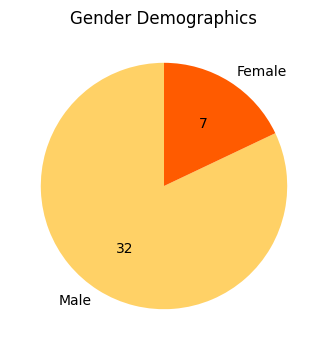

Age
19     2
20    13
21    16
22     3
23     2
27     2
29     1
Name: count, dtype: int64


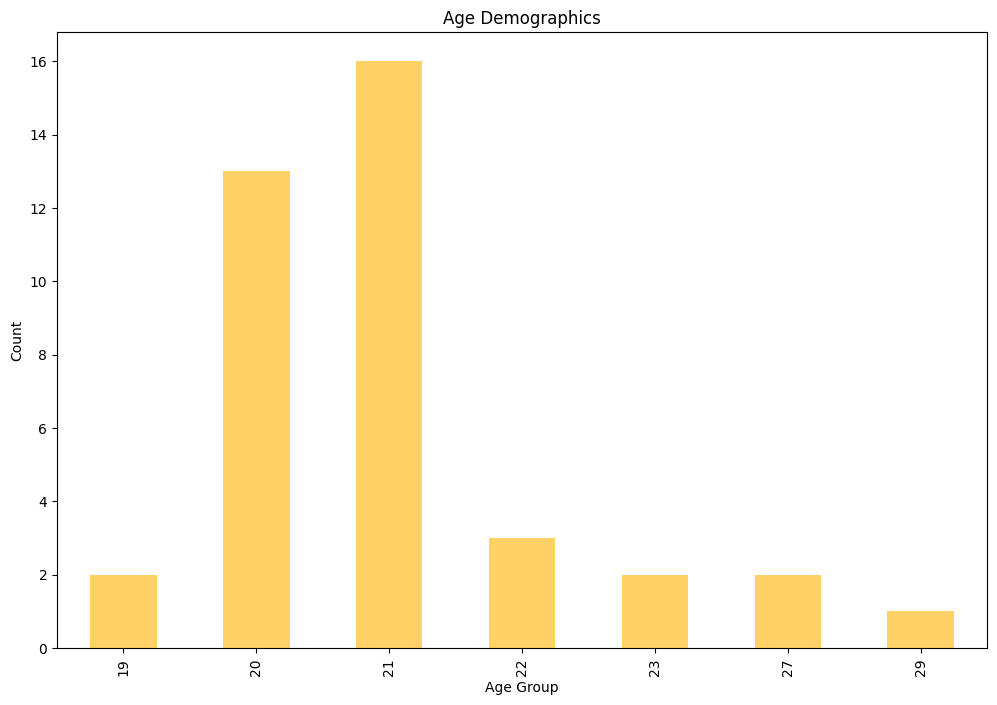

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your CSV file is named 'your_data.csv'
df = pd.read_csv('formresponses.csv')

# Pie chart for gender demographics with counts
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(gender_counts) / 100), startangle=90, colors=['#FFD166', '#FF5B00'])
plt.title('Gender Demographics')
plt.show()

# Bar chart for age demographics
age_counts = df['Age'].value_counts().sort_index()
print(age_counts)
plt.figure(figsize=(12, 8))
age_counts.plot(kind='bar', color='#FFD166')
plt.title('Age Demographics')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
